<a href="https://colab.research.google.com/github/lauben2001/Monte_Carlo_stocks/blob/main/Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

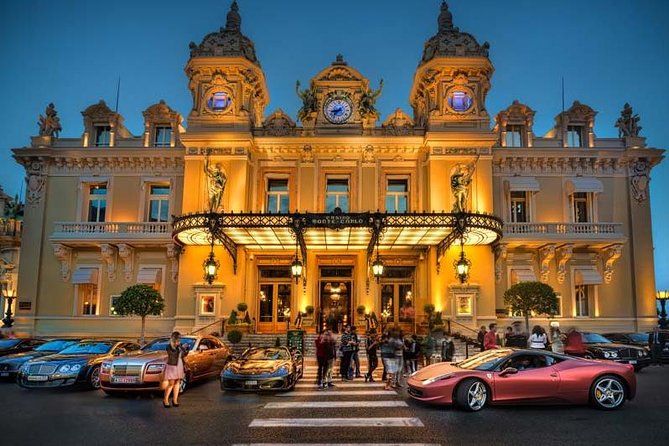

## **Monte Carlo Simulation Version 1.0**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import random as np_random
from math import e

In [ ]:
EA= 0.08
STDA= 0.2
EB= 0.03
STDB= 0.05
EC= 0.15
STDC = 0.3
ED = 0.01
STDD = 0.01
EE = 0.07
STDE = 0.15

mean = pd.Series=([0.08, 0.03, 0.15, 0.01, 0.07])
std = pd.Series=([0.2, 0.05, 0.3, 0.01, 0.15])
def distribution_v (mean, std):
  return np.log(1+(std**2/((1+mean)**2)))**0.5

def distribution_m (mean, v):
  return np.log(1+mean)-0.5*v**2

def gen_return (m , v):
  return e**(m+np.random.standard_normal()*v)

for i in range(5):
  RA= gen_return(distribution_m(mean[0],distribution_v(mean[0],std[0])),distribution_v(mean[0],std[0]))






In [ ]:
HvA=(np.log(1+(STDA**2/((1+EA)**2))))**0.5
HmA=np.log(1+EA)-0.5*HvA**2
HvB=(np.log(1+(STDB**2/((1+EB)**2))))**0.5
HmB=np.log(1+EB)-0.5*HvB**2
HvC=(np.log(1+(STDC**2/((1+EC)**2))))**0.5
HmC=np.log(1+EC)-0.5*HvC**2
HvD=(np.log(1+(STDD*2/((1+ED)**2))))**0.5
HmD=np.log(1+ED)-0.5*HvD**2
HvE=(np.log(1+(STDE*2/((1+EE)**2))))**0.5
HmE=np.log(1+EE)-0.5*HvE**2

In [ ]:
mA=HmA
vA=HvA
mB=HmB
vB=HvB
mC=HmC
vC=HvC
mD=HmD
vD=HvD
mE=HmD
vE=HvD

SimNumb= 100000      #Anzahl Simulationen
xA=0.2              #Anteil A  (START)
xB=0.1              #Anteil B  (START)
xC=0.25             #Anteil C  (START)
xD=0.2              #Anteil D  (START)
xE=0.25             #Anteil E  (START)
RG=0                #Gesamtrendite
V0=1000             #Anfangsvermögen
V=1000              #Vermögensvariable
V_Sim=0             #Endvermögenszähler
VA=xA*V0            #Aktienvolumen
VB=xB*V0            #Bondvolumen
VC=xC*V0
VD=xD*V0
VE=xE*V0
T=10                 #Anlagezeitraum
t=1                  #Hilfsvariable
SW_Z=V0              #Shortfall Nivau
SW=0
MEL_SUM=0            #Mean Excess Loss
MEL_N=0              #Mean Excess Loss Zähler
MEL= 0
SEW=0
S_DEV = pd.series=(np.arange(T))
S_REW = pd.series=(np.arange(T))
S_SW = pd.series=(np.arange(T))
S_MEL = pd.series=(np.arange(T))
S_SEW = pd.series=(np.arange(T))

for x in range(T):
  for i in range(SimNumb):
    for z in range(t):
      A=np.random.standard_normal()
      RA=e**(mA+A*vA)
      B=np.random.standard_normal()
      RB=e**(mB+B*vB)
      C=np.random.standard_normal()
      RC=e**(mC+C*vC)
      D=np.random.standard_normal()
      RD=e**(mD+D*vD)
      E=np.random.standard_normal()
      RE=e**(mE+E*vE)
      VA=VA*RA
      VB=VB*RB
      VC=VC*RC
      VD=VD*RD
      VE=VE*RE
      V=VA+VB+VC+VD+VE
    V_Sim=V_Sim + V
    if V<SW_Z:
      SW=SW+1
      MEL_N=MEL_N+1
      MEL_SUM=MEL_SUM+(V0-V)
    V=V0
    VA=xA*V0
    VB=xB*V0
    VC=xC*V0
    VD=xD*V0
    VE=xE*V0

  V_Sim=V_Sim *(1/SimNumb)
  RG= ((V_Sim/V0)-1)*100
  SW=(SW/SimNumb)*100
  MEL = (1/ MEL_N)*MEL_SUM
  SEW= MEL* SW
  S_DEV[t-1] = V_Sim
  S_REW[t-1] = RG
  S_SW[t-1] = SW
  S_MEL[t-1] = MEL
  S_SEW[t-1] = SEW
  t=t+1
  V_Sim=0
  RG=0
  V=1000
  SW_Z=V0
  SW=0
  MEL_SUM=0
  MEL_N=0
  MEL= 0
  SEW=0

results = pd.DataFrame({})
results['Durschnittliches Endvermögen'] = S_DEV
results['Rendite Erwartungswert'] = S_REW
results['Shortfall Wahrscheinlichkeit'] = S_SW
results['Mean Excess Loss'] = S_MEL
results['Shortfall Erwartungswert'] = S_SEW
results.index += 1
print(results)

In [ ]:
plt.figure(); results["Durschnittliches Endvermögen"].plot(); plt.legend(loc='best')
plt.figure(); results['Rendite Erwartungswert'].plot(); plt.legend(loc='best')
plt.figure(); results['Shortfall Wahrscheinlichkeit'].plot(); plt.legend(loc='best')
plt.figure(); results['Mean Excess Loss'].plot(); plt.legend(loc='best')
plt.figure(); results['Shortfall Erwartungswert'].plot(); plt.legend(loc='best')

# **Zeitreihenanalyse**

In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import pandas
!pip install yfinance
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [ ]:
start= "2010-01-01"
end= datetime.today().strftime("%Y-%m-%d")

In [ ]:
#Select stocks via Ticker
stocks= ["AAPL", "TSLA"]
start_allocation= np.array([0.5,0.5])
v_start= 1000

metrics=pd.DataFrame([])
for i in stocks:
  df = pdr.get_data_yahoo(i, start=start, end=end)
  returns= df["Adj Close"].pct_change()
  returns= returns.dropna()
  mean= returns.mean()
  std = returns.std()
  stock_data = pd.Series([mean, std,])
  #stock_data.name= i
  metrics[i] = stock_data
metrics = metrics.transpose()
metrics = metrics.rename({0: 'mean', 1: 'std'}, axis=1)
metrics['start_allocation'] = start_allocation
volume= metrics["start_allocation"]*v_start
metrics["volume"]= volume
metrics

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,mean,std,start_allocation,volume
AAPL,0.001224,0.017702,0.5,500.0
TSLA,0.002442,0.035594,0.5,500.0


# **Monte Carlo Simulation - Version 2.0 (ohne Rebalancing)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime
from numpy import random as np_random
from math import e
!pip install yfinance
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [ ]:
#Select stocks via Ticker
stocks= ["AAPL", "TSLA","BAC","C"]
start= "2010-01-01"
end= datetime.today().strftime("%Y-%m-%d")
start_allocation= np.array([0.25,0.25,0.25,0.25])
v_start= 1000
sim_numb= 100
v_start=1000
sw_z=v_start
T=30

metrics=pd.DataFrame([])
for i in stocks:
  df = pdr.get_data_yahoo(i, start=start, end=end)
  returns= df["Adj Close"].pct_change()
  returns= returns.dropna()
  mean= returns.mean()
  std = returns.std()
  stock_data = pd.Series([mean, std,])
  metrics[i] = stock_data
metrics = metrics.transpose()
metrics = metrics.rename({0: 'mean', 1: 'std'}, axis=1)
metrics['start_allocation'] = start_allocation
volume= metrics["start_allocation"]*v_start
metrics["volume"]= volume
metrics


if metrics["start_allocation"].sum() ==1:
  ()
else:
  print("ERROR! Weights do not add up t0")


def simulation_noreb(mean, std, V, T):
  v=np.log(1+(std**2/((1+mean)**2)))**0.5
  m=np.log(1+mean)-0.5*v**2
  for i in range(T):
    V = (e**(m+np.random.standard_normal()*v))*V
  return V

sw=0
v_sim=0
sw_count = 0
mel_volume= 0
rg=0
t=1                  #Hilfsvariable
s_dev = pd.series=(np.arange(T))
s_rew = pd.series=(np.arange(T))
s_sw = pd.series=(np.arange(T))
s_mel = pd.series=(np.arange(T))


for x in range(T):
  for z in range(sim_numb):
    v_help=0
    for i, j in metrics.iterrows():
      v_help=v_help + simulation_noreb(j[0],j[1],j[3],t)

    v_sim= v_sim + v_help
    if v_help< sw_z:
      sw_count +=1
      mel_volume = mel_volume + (sw_z - v_help)


  v_sim = v_sim * (1/sim_numb)
  if sw_count !=0:
    mel_volume = mel_volume * (1/sw_count)
  sw= sw_count / sim_numb
  rg = (v_sim / v_start)-1

  s_dev[t-1] = v_sim
  s_rew[t-1] = rg*100
  s_sw[t-1] = sw*100
  s_mel[t-1] = mel_volume
  t=t+1

  sw=0
  v_sim=0
  sw_count = 0
  mel_volume= 0
  rg = 0

results = pd.DataFrame({})
results['Durschnittliches Endvermögen'] = s_dev
results['Rendite Erwartungswert'] = s_rew
results['Shortfall Wahrscheinlichkeit'] = s_sw
results['Mean Excess Loss'] = s_mel
results.index += 1
print(results)

In [ ]:
plt.figure(); results["Durschnittliches Endvermögen"].plot(); plt.legend(loc='best')
plt.figure(); results['Rendite Erwartungswert'].plot(); plt.legend(loc='best')
plt.figure(); results['Shortfall Wahrscheinlichkeit'].plot(); plt.legend(loc='best')
plt.figure(); results['Mean Excess Loss'].plot(); plt.legend(loc='best')

**Versuch einer Funktion**

In [ ]:
def montecarlo_simulation(stocks, start, start_allocation, v_start, sim_numb, T):
  #stocks= ["AAPL", "TSLA","BAC","C"]
  #start= "2010-01-01"
  #start_allocation= np.array([0.25,0.25,0.25,0.25])
  #v_start= 1000
  #sim_numb= 1000
  #v_start=1000
  #T=30
  end= datetime.today().strftime("%Y-%m-%d")
  sw_z=v_start


  metrics=pd.DataFrame([])
  for i in stocks:
    df = pdr.get_data_yahoo(i, start=start, end=end)
    returns= df["Adj Close"].pct_change()
    returns= returns.dropna()
    mean= returns.mean()
    std = returns.std()
    stock_data = pd.Series([mean, std,])
    metrics[i] = stock_data
  metrics = metrics.transpose()
  metrics = metrics.rename({0: 'mean', 1: 'std'}, axis=1)
  metrics['start_allocation'] = start_allocation
  volume= metrics["start_allocation"]*v_start
  metrics["volume"]= volume
  metrics


  if metrics["start_allocation"].sum() ==1:
    ()
  else:
    print("ERROR! Weights do not add up t0")


  def simulation_noreb(mean, std, V, T):
    v=np.log(1+(std**2/((1+mean)**2)))**0.5
    m=np.log(1+mean)-0.5*v**2
    for i in range(T):
      V = (e**(m+np.random.standard_normal()*v))*V
    return V

  sw=0
  v_sim=0
  sw_count = 0
  mel_volume= 0
  rg=0
  t=1                  #Hilfsvariable
  s_dev = pd.series=(np.arange(T))
  s_rew = pd.series=(np.arange(T))
  s_sw = pd.series=(np.arange(T))
  s_mel = pd.series=(np.arange(T))


  for x in range(T):
    for z in range(sim_numb):
      v_help=0
      for i, j in metrics.iterrows():
        v_help=v_help + simulation_noreb(j[0],j[1],j[3],t)

      v_sim= v_sim + v_help
      if v_help< sw_z:
        sw_count +=1
        mel_volume = mel_volume + (sw_z - v_help)


    v_sim = v_sim * (1/sim_numb)
    if sw_count !=0:
      mel_volume = mel_volume * (1/sw_count)
    sw= sw_count / sim_numb
    rg = (v_sim / v_start)-1

    s_dev[t-1] = v_sim
    s_rew[t-1] = rg*100
    s_sw[t-1] = sw*100
    s_mel[t-1] = mel_volume
    t=t+1

    sw=0
    v_sim=0
    sw_count = 0
    mel_volume= 0
    rg = 0

  results = pd.DataFrame({})
  results['Durschnittliches Endvermögen'] = s_dev
  results['Rendite Erwartungswert'] = s_rew
  results['Shortfall Wahrscheinlichkeit'] = s_sw
  results['Mean Excess Loss'] = s_mel
  results.index += 1
  return results

In [ ]:
stocks= ["AAPL", "TSLA","BAC","C"]
start= "2010-01-01"
start_allocation= np.array([0.25,0.25,0.25,0.25])

print(montecarlo_simulation(stocks, start, start_allocation, 1000, 100, 30))

# **Monte Carlo Simulation - Version 2.0 (Rebalancing)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime
from numpy import random as np_random
from math import e
!pip install yfinance
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [ ]:
#Select stocks via Ticker
stocks= ["AAPL", "TSLA"]
start_allocation= np.array([0.5,0.5])
start= "2010-01-01"
end= datetime.today().strftime("%Y-%m-%d")
v_start= 1000
sim_numb= 1000
v_start=1000
sw_z=v_start
T=5

metrics=pd.DataFrame([])
for i in stocks:
  df = pdr.get_data_yahoo(i, start=start, end=end)
  returns= df["Adj Close"].pct_change()
  returns= returns.dropna()
  mean= returns.mean()
  std = returns.std()
  stock_data = pd.Series([mean, std,])
  metrics[i] = stock_data
metrics = metrics.transpose()
metrics = metrics.rename({0: 'mean', 1: 'std'}, axis=1)
metrics['start_allocation'] = start_allocation
volume= metrics["start_allocation"]*v_start
metrics["volume"]= volume


if metrics["start_allocation"].sum() ==1:
  ()
else:
  print("ERROR! Weights do not add up to 1!")


def simulation_reb(mean, std, V):
  v=np.log(1+(std**2/((1+mean)**2)))**0.5
  m=np.log(1+mean)-0.5*v**2
  V = (e**(m+np.random.standard_normal()*v))*V
  return V

rg= 0
sw=0
v_sim=0
sw_count = 0
mel_volume= 0
t=0                  #Hilfsvariable (startet bei 0, da direkt zu anfang der Schleife + 1 genommen wird)
s_dev = pd.series=(np.arange(T))
s_rew = pd.series=(np.arange(T))
s_sw = pd.series=(np.arange(T))
s_mel = pd.series=(np.arange(T))


for x in range(T):
  t=t+1
  rg= 0
  sw=0
  sw_count = 0
  mel_volume= 0
  v_sim=0
  rg = 0
  v_help=0
  metrics["volume"]=  metrics["start_allocation"]*v_start

  for z in range(sim_numb):
    v_help=0
    metrics["volume"]= metrics["start_allocation"]*v_start
    for z in range(t):
      for i, j in metrics.iterrows():
        v_help= v_help + simulation_reb(j[0],j[1],j[3])
      metrics["volume"]=  metrics["start_allocation"]*v_help
      v_help= 0

    #Am Ende jedes Simulationspfades
    v_sim= v_sim + metrics["volume"].sum()
    if metrics["volume"].sum()< sw_z:
      sw_count +=1
      mel_volume = mel_volume + (sw_z - metrics["volume"].sum())


  #Ergebnisberechnung nach der Simulation
  v_sim = v_sim * (1/sim_numb)
  if sw_count !=0:
    mel_volume = mel_volume * (1/sw_count)
  sw= sw_count / sim_numb
  rg=(v_sim / v_start)-1

  s_dev[t-1] = v_sim
  s_rew[t-1] = rg*100
  s_sw[t-1] = sw*100
  s_mel[t-1] = mel_volume

results = pd.DataFrame({})
results['Durschnittliches Endvermögen'] = s_dev
results['Rendite Erwartungswert'] = s_rew
results['Shortfall Wahrscheinlichkeit'] = s_sw
results['Mean Excess Loss'] = s_mel
results.index += 1
print(results)

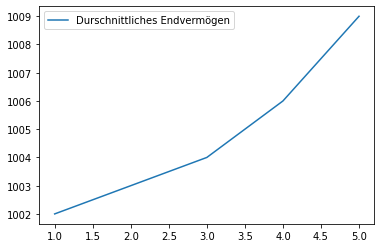

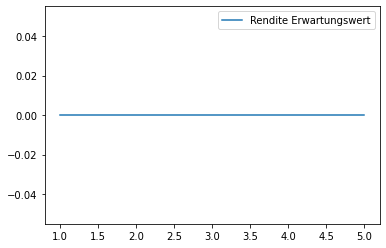

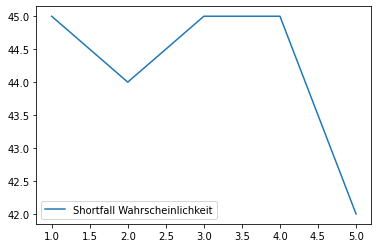

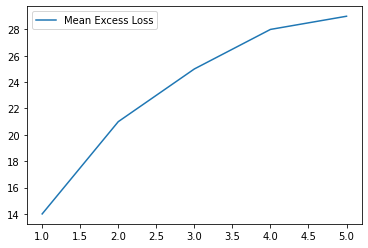

In [ ]:
plt.figure(); results["Durschnittliches Endvermögen"].plot(); plt.legend(loc='best')
plt.figure(); results['Rendite Erwartungswert'].plot(); plt.legend(loc='best')
plt.figure(); results['Shortfall Wahrscheinlichkeit'].plot(); plt.legend(loc='best')
plt.figure(); results['Mean Excess Loss'].plot(); plt.legend(loc='best')

# **Monte Carlo Optimization [2 Assets]**

In [ ]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import random
from numpy import random as np_random
from math import e
!pip install yfinance
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

**Funktion für Randomisierung der Gewichte**

In [ ]:
def p_weights(num_sec):
  weights= np.random.random(size=num_sec)
  temp_weights=np.random.random(size=num_sec)
  for x in range(1000000):
    temp_weights=np.random.random(size=num_sec)
    if (weights.sum()-1)**2 > (temp_weights.sum()-1)**2:
      weights = temp_weights
  return weights.sum()

In [ ]:
print(p_weights(2))

1.0000005856026686


In [ ]:
#Select stocks via Ticker
stocks= ["AAPL", "TSLA"]
start_allocation= np.array([0.5,0.5])
v_start= 1000
sim_numb= 1000                #Number of simulations
sw_z=1000                     #Definition of shortfall level
sw_constraint= 0.1            #Confidence level for Optimization
v_best= 0
V=1000                        #Starting Capital
T=5                           #Investment Period

metrics=pd.DataFrame([])
for i in stocks:
  df = pdr.get_data_yahoo(i, start=start, end=end)
  returns= df["Adj Close"].pct_change()
  returns= returns.dropna()
  mean= returns.mean()
  std = returns.std()
  stock_data = pd.Series([mean, std,])
  metrics[i] = stock_data
metrics = metrics.transpose()
metrics = metrics.rename({0: 'mean', 1: 'std'}, axis=1)
metrics['start_allocation'] = start_allocation
volume= metrics["start_allocation"]*v_start
metrics["volume"]= volume


best_alloc = np.array([0.5, 0.5])
if metrics["allocation"].sum() ==1:
  ()
else:
  print("ERROR! Weights do not add up t0")


def simulation(mean, std, V, T):
  v=np.log(1+(std**2/((1+mean)**2)))**0.5
  m=np.log(1+mean)-0.5*v**2
  for i in range(T):
    V = (e**(m+np.random.standard_normal()*v))*V
  return V



for z in range(1000):
  x_stock = np.random.uniform(low=0.0, high=1.0, size=None)
  x_bond= 1- x_stock
  alloc= np.array([x_stock, x_bond])
  metrics["allocation"]= alloc
  volume= metrics["allocation"]*V
  metrics["volume"]= volume

  v_sim=0
  sw_count = 0
  mel_volume= 0
  for i in range(sim_numb):
    v_help=0
    for i, j in metrics.iterrows():
      v_help=v_help + simulation(j[0],j[1],j[3],T)

    v_sim= v_sim + v_help
    if v_help< sw_z:
      sw_count +=1
      mel_volume = mel_volume + (sw_z - v_help)


  v_sim = v_sim * (1/sim_numb)
  mel_volume = mel_volume * (1/sw_count)
  sw= sw_count / sim_numb

  if sw < sw_constraint:
    if v_sim > v_best:
      best_alloc = metrics["allocation"]
      v_sim_best= v_sim
      sw_best= sw
      mel_volume_best =mel_volume
  else:
    ()


print(best_alloc)
print(v_sim_best)
print(sw_best)
print(mel_volume_best)

Stocks    0.053087
Bonds     0.946913
Name: allocation, dtype: float64
(1175.4702451505739,)
0.072
42.8510863577547


# **Monte Carlo Simulation - Version 2.0 (ohne Rebalancing) fixe Zeit**  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import random as np_random
from math import e
!pip install yfinance
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [ ]:
#Select stocks via Ticker
stocks= ["AAPL", "TSLA"]
start_allocation= np.array([0.5,0.5])
v_start= 1000

metrics=pd.DataFrame([])
for i in stocks:
  df = pdr.get_data_yahoo(i, start=start, end=end)
  returns= df["Adj Close"].pct_change()
  returns= returns.dropna()
  mean= returns.mean()
  std = returns.std()
  stock_data = pd.Series([mean, std,])
  metrics[i] = stock_data
metrics = metrics.transpose()
metrics = metrics.rename({0: 'mean', 1: 'std'}, axis=1)
metrics['start_allocation'] = start_allocation
volume= metrics["start_allocation"]*v_start
metrics["volume"]= volume

sim_numb= 1000
sw_z=1000
v_start=1000
T=5
if metrics["start_allocation"].sum() ==1:
  ()
else:
  print("ERROR! Weights do not add up t0")


def simulation_noreb(mean, std, V, T):
  v=np.log(1+(std**2/((1+mean)**2)))**0.5
  m=np.log(1+mean)-0.5*v**2
  for i in range(T):
    V = (e**(m+np.random.standard_normal()*v))*V
  return V


v_sim=0
sw_count = 0
mel_volume= 0
for i in range(sim_numb):
  v_help=0
  for i, j in metrics.iterrows():
    v_help=v_help + simulation_noreb(j[0],j[1],j[3],T)

  v_sim= v_sim + v_help
  if v_help< sw_z:
    sw_count +=1
    mel_volume = mel_volume + (sw_z - v_help)


v_sim = v_sim * (1/sim_numb)
if sw_count !=0:
  mel_volume = mel_volume * (1/sw_count)
sw= sw_count / sim_numb

print (v_sim)
print(sw*100)
print (mel_volume)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
1010.4028383291491
41.6
31.5475379439484


# **Monte Carlo Simulation - Version 2.0 (Rebalancing) fixe Zeit**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import random as np_random
from math import e
!pip install yfinance
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [ ]:
#Select stocks via Ticker
stocks= ["AAPL", "TSLA"]
start_allocation= np.array([0.5,0.5])
v_start= 1000

metrics=pd.DataFrame([])
for i in stocks:
  df = pdr.get_data_yahoo(i, start=start, end=end)
  returns= df["Adj Close"].pct_change()
  returns= returns.dropna()
  mean= returns.mean()
  std = returns.std()
  stock_data = pd.Series([mean, std,])
  metrics[i] = stock_data
metrics = metrics.transpose()
metrics = metrics.rename({0: 'mean', 1: 'std'}, axis=1)
metrics['start_allocation'] = start_allocation
volume= metrics["start_allocation"]*v_start
metrics["volume"]= volume

sim_numb= 1000
sw_z=1000
v_start=1000
T=5
if metrics["start_allocation"].sum() ==1:
  ()
else:
  print("ERROR! Weights do not add up t0")


def simulation_reb(mean, std, V):
  v=np.log(1+(std**2/((1+mean)**2)))**0.5
  m=np.log(1+mean)-0.5*v**2
  V = (e**(m+np.random.standard_normal()*v))*V
  return V


v_sim=0
sw_count = 0
mel_volume= 0
for i in range(sim_numb):
  v_help=0
  metrics["volume"]=  metrics["start_allocation"]*v_start
  for t in range(T):
    for i, j in metrics.iterrows():
      v_help= v_help + simulation_reb(j[0],j[1],j[3])
    metrics["volume"]=  metrics["start_allocation"]*v_help
    v_help= 0

  #Am Ende jedes Simulationspfades
  v_sim= v_sim + metrics["volume"].sum()
  if metrics["volume"].sum()< sw_z:
    sw_count +=1
    mel_volume = mel_volume + (sw_z - metrics["volume"].sum())

#Ergebnisberechnung nach der Simulation
v_sim = v_sim * (1/sim_numb)
if sw_count !=0:
  mel_volume = mel_volume * (1/sw_count)
sw= sw_count / sim_numb

print (v_sim)
print(sw*100)
print (mel_volume)